# Question 1

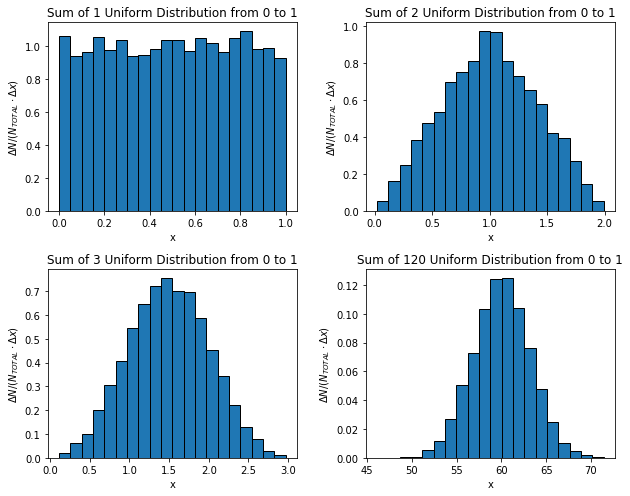

In [1]:
%matplotlib inline
import numpy as npy
import matplotlib.pyplot as plt
from prettytable import PrettyTable

n = 10000
bins = 20

def uniform_sum(low,upper,sumAmount,n):
    dist = []
    for x in range(n):
        total = 0
        for val in npy.random.uniform(low,upper,sumAmount):
            total += val
        dist.append(total)
    return dist

# Figure
f = plt.figure(figsize=(9,7)) # make a bigger 12cm x 7cm figure

def plot_uniform_sum(graphPos, bins, lowerBound, upperBound, sumAmount):
    data = uniform_sum(lowerBound,upperBound,sumAmount,n)
    p = plt.subplot(2,2,graphPos)
    p.hist(data, edgecolor='black', linewidth=1, density=True, bins=bins)
    p.set_title("Sum of "+str(sumAmount)+" Uniform Distribution from 0 to 1")
    p.set_xlabel('x')
    p.set_ylabel(r'$ \Delta N /  (N_{TOTAL} \cdot \Delta x)$')
    
plot_uniform_sum(1,bins,0,1,1)
plot_uniform_sum(2,bins,0,1,2)
plot_uniform_sum(3,bins,0,1,3)
plot_uniform_sum(4,bins,0,1,120)

plt.tight_layout()
plt.show()

In [2]:
# Returns the mean and standard deviation of a summed uniform distribution.
def uniform_sum_meanSD(lowerBound, upperBound, sumAmount):
    mean = 0
    variance = 0;
    for x in range(sumAmount):
        mean += (upperBound-lowerBound)/2
        variance += ((upperBound-lowerBound)**2)/12
    return mean,variance**0.5

# Calculates the mean and standard deviation of a dataset.
def meanSD(x):
    #Calculate Mean of array
    mean = sum(x)/len(x)
    #Calculate SD of array
    sd = 0.
    for v in x:
        sd += (v-mean)**2   
    sd = (sd/len(x))**0.5
    return mean, sd

# Prints a table for the Experimental and Theoretical Mean and Standard Deviation for Uniform Distribution Sums.
def printDistributionValues(lowerBound, upperBound, sumAmount):
    
    print("Mean and Standard Deviation for the sum of {0} Uniform Distributions between {1} & {2}".format(sumAmount,lowerBound,upperBound))
    experimental = meanSD(uniform_sum(lowerBound,upperBound,sumAmount,n))   # Mean and SD for the data set
    theoretical  = uniform_sum_meanSD(lowerBound,upperBound,sumAmount)      # Prints Theoretical Mean and SD 
    
    # Prints Table of results
    table = PrettyTable(['','Mean','Standard Deviation'])
    table.add_row(["Experimental","{0:10.4f}".format(experimental[0]),"{0:10.4f}".format(experimental[1])])
    table.add_row(["Theoretical","{0:10.4f}".format(theoretical[0]),"{0:10.4f}".format(theoretical[1])])
    print(table)
    print("")

printDistributionValues(0,1,1)
printDistributionValues(0,1,2)
printDistributionValues(0,1,3)
printDistributionValues(0,1,12)

Mean and Standard Deviation for the sum of 1 Uniform Distributions between 0 & 1
+--------------+------------+--------------------+
|              |    Mean    | Standard Deviation |
+--------------+------------+--------------------+
| Experimental |     0.4986 |         0.2890     |
| Theoretical  |     0.5000 |         0.2887     |
+--------------+------------+--------------------+

Mean and Standard Deviation for the sum of 2 Uniform Distributions between 0 & 1
+--------------+------------+--------------------+
|              |    Mean    | Standard Deviation |
+--------------+------------+--------------------+
| Experimental |     1.0000 |         0.4075     |
| Theoretical  |     1.0000 |         0.4082     |
+--------------+------------+--------------------+

Mean and Standard Deviation for the sum of 3 Uniform Distributions between 0 & 1
+--------------+------------+--------------------+
|              |    Mean    | Standard Deviation |
+--------------+------------+------------

These four histograms show the Irwin–Hall distribution. The first is uniform, the second triangular and then 
 